# Variables adressed: Tax | PaintQuality% | PreviousOwners

### 1. Quick General Steps

### Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


### Load Data

In [2]:
car_eval = pd.read_csv('Data/train.csv')

In [3]:
car_eval .head()

carID   Brand      model    year  price transmission  mileage fuelType  \
0  69512      VW       Golf  2016.0  22290    Semi-Auto  28421.0   Petrol   
1  53000  Toyota      Yaris  2019.0  13790       Manual   4589.0   Petrol   
2   6366    Audi         Q2  2019.0  24990    Semi-Auto   3624.0   Petrol   
3  29021    Ford     FIESTA  2018.0  12500        anual   9102.0   Petrol   
4  10062     BMW   2 Series  2019.0  22995       Manual   1000.0   Petrol   

     tax        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
0    NaN  11.417268         2.0           63.0        4.000000        0.0  
1  145.0  47.900000         1.5           50.0        1.000000        0.0  
2  145.0  40.900000         1.5           56.0        4.000000        0.0  
3  145.0  65.700000         1.0           50.0       -2.340306        0.0  
4  145.0  42.800000         1.5           97.0        3.000000        0.0

### Set index

In [7]:
car_eval  = car_eval .set_index('carID')

In [8]:
car_eval.head()

Brand      model    year  price transmission  mileage fuelType    tax  \
carID                                                                           
69512      VW       Golf  2016.0  22290    Semi-Auto  28421.0   Petrol    NaN   
53000  Toyota      Yaris  2019.0  13790       Manual   4589.0   Petrol  145.0   
6366     Audi         Q2  2019.0  24990    Semi-Auto   3624.0   Petrol  145.0   
29021    Ford     FIESTA  2018.0  12500        anual   9102.0   Petrol  145.0   
10062     BMW   2 Series  2019.0  22995       Manual   1000.0   Petrol  145.0   

             mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                   
69512  11.417268         2.0           63.0        4.000000        0.0  
53000  47.900000         1.5           50.0        1.000000        0.0  
6366   40.900000         1.5           56.0        4.000000        0.0  
29021  65.700000         1.0           50.0       -2.340306        0.0  
10062  42.800000         1.5           97.0        3.000000        0.0

In [9]:
car_eval .describe(include = 'all').T

count unique     top   freq          mean           std  \
Brand             74452     72    Ford  14808           NaN           NaN   
model             74456    735   Focus   6353           NaN           NaN   
year            74482.0    NaN     NaN    NaN   2017.096611      2.208704   
price           75973.0    NaN     NaN    NaN  16881.889553   9736.926322   
transmission      74451     40  Manual  38050           NaN           NaN   
mileage         74510.0    NaN     NaN    NaN  23004.184088  22129.788366   
fuelType          74462     34  Petrol  37995           NaN           NaN   
tax             68069.0    NaN     NaN    NaN    120.329078     65.521176   
mpg             68047.0    NaN     NaN    NaN     55.152666     16.497837   
engineSize      74457.0    NaN     NaN    NaN      1.660136      0.573462   
paintQuality%   74449.0    NaN     NaN    NaN     64.590667     21.021065   
previousOwners  74423.0    NaN     NaN    NaN       1.99458      1.472981   
hasDamage       74425.0    NaN     NaN    NaN           0.0           0.0   

                         min      25%      50%      75%          max  
Brand                    NaN      NaN      NaN      NaN          NaN  
model                    NaN      NaN      NaN      NaN          NaN  
year                  1970.0   2016.0   2017.0   2019.0  2024.121759  
price                  450.0  10200.0  14699.0  20950.0     159999.0  
transmission             NaN      NaN      NaN      NaN          NaN  
mileage        -58540.574478  7423.25  17300.0  32427.5     323000.0  
fuelType                 NaN      NaN      NaN      NaN          NaN  
tax                -91.12163    125.0    145.0    145.0        580.0  
mpg               -43.421768     46.3     54.3     62.8        470.8  
engineSize         -0.103493      1.2      1.6      2.0          6.6  
paintQuality%       1.638913     47.0     65.0     82.0   125.594308  
previousOwners      -2.34565      1.0      2.0      3.0     6.258371  
hasDamage                0.0      0.0      0.0      0.0          0.0

### Data Overview

In [9]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


%|                                                                                           | 0/14 [00:00<?, ?it/s]
%|█████▉                                                                             | 1/14 [00:00<00:11,  1.10it/s]
%|███████████▊                                                                       | 2/14 [00:01<00:05,  2.12it/s]
%|█████████████████▊                                                                 | 3/14 [00:01<00:03,  3.24it/s]
100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:01<00:00,  9.89it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Specific Variable Exploration

#### 1. Data Exploration: Exploring data meaning, detecting Anomalies, Incongruencies, Invalid values.

#### 2. Addressing Issues: Potentail strategies to adressed identified issues (with justifications and alternatives)

In [89]:
# Drop previous ownsers?

### Tax Data Understanding

In [88]:
# Understanding Tax
# The tax variable is likely to represent the UK Vehicle Excise Duty (VED) (aka Road Tax)
# "Vehicle excise duty (VED) is a tax levied on every vehicle using public roads in the UK and is collected by the Driver and Vehicle Licensing Agency (DVLA) (Office for Budget Responsibility)
# This would make since given the british pound currency, and both the data exploration below combined with external research validates this deduction.

In [19]:
# Comments: Filipa: Tax: acredito que não existem valores negativos, logo temos erros (Indeed!)

In [85]:
# Info
car_eval['tax'].info()

# Why a float?

<class 'pandas.core.series.Series'>
Index: 75973 entries, 69512 to 15795
Series name: tax
Non-Null Count  Dtype  
--------------  -----  
68069 non-null  float64
dtypes: float64(1)
memory usage: 1.2 MB


In [11]:
# Summary statistics
car_eval['tax'].describe()

# Mean seems reasonable (even pre pre-processing) (Drivers of relatively fuel-efficient petrol or diesel cars (up to 50g/km CO2) typically pay up to £130 for the year when they first register the vehicle) (OBR) 
# Std within expected
# Max within reason: "Drivers of less fuel-efficient cars pay more, up to a maximum of £5490" (Gov.uk)
# Negative does not make sense. There is no evidence (nor logical reasoning) supporting negative Tax. How to adress?
# Floats: Several values are fractional (non-integers). why? there is no oficial float value for road tax brackets

count    68069.000000
mean       120.329078
std         65.521176
min        -91.121630
25%        125.000000
50%        145.000000
75%        145.000000
max        580.000000
Name: tax, dtype: float64

In [23]:
# Checking unique values of Tax
car_eval['tax'].unique()

array([         nan, 145.        ,  30.        ,  20.        ,
       150.        , 160.        , -56.19320154,   0.        ,
       125.        , 200.        , 250.        , 135.        ,
       300.        , 205.        , 260.        , 326.02823317,
       325.        , -45.78061049, 265.        , 305.        ,
       303.14889146, 235.        , 299.47350391, 240.        ,
       165.        , 140.        , 540.        , 155.        ,
       220.        , 120.        , 330.        , 290.48678508,
       -20.24107949, -18.33074314, 327.91577835, 270.        ,
       115.        , 185.        , 316.48718937, 570.        ,
       -49.15354066, 316.29630636, -60.6840948 , 555.        ,
       277.38425448, -91.12163048,  10.        , 315.        ,
       190.        , -31.91494466, 230.        , -43.24208237,
       294.84340933, 195.        , 580.        , 290.        ,
       130.        , 565.        , 210.        , 280.        ,
       255.        , 520.        , 295.        , 245.  

In [36]:
# Checking frequency of each unique value of tax

tax_unique_values= car_eval['tax'].value_counts(dropna = False).sort_index()
pd.set_option('display.max_rows', None)
print(tax_unique_values)

tax
-91.121630        25
-60.684095        40
-56.193202        56
-49.153541        54
-45.780610        76
-43.242082        33
-31.914945        18
-20.241079        53
-18.330743        23
 0.000000       4320
 10.000000        15
 20.000000      5610
 30.000000      5781
 110.000000        2
 115.000000        8
 120.000000       12
 125.000000     4496
 130.000000        1
 135.000000      847
 140.000000      256
 145.000000    32861
 150.000000     7400
 155.000000       11
 160.000000     1401
 165.000000      468
 185.000000        4
 190.000000       13
 195.000000        7
 200.000000     1641
 205.000000      466
 210.000000        2
 220.000000        4
 230.000000        8
 235.000000      458
 240.000000      135
 245.000000        1
 250.000000        4
 255.000000        3
 260.000000      371
 265.000000      107
 270.000000        8
 277.384254       23
 280.000000        4
 290.000000        4
 290.486785       55
 294.843409       15
 295.000000        1
 299.4735

In [48]:
# Unique values: Improvements in data understanding
## Creating logical categories: (Negative, Zeros, Positive, Nas)

def tax_category(x):
    if pd.isna(x):
        return 'NaN'
    elif x == 0:
        return 'Zero'
    elif x < 0:
        return 'Negative'
    else:
        return 'Positive'

category_counts = car_eval['tax'].apply(tax_category).value_counts()

print(category_counts)



tax
Positive    63371
NaN          7904
Zero         4320
Negative      378
Name: count, dtype: int64


In [49]:
# Adding proportions

for category, count in category_counts.items():
    percent = (count / len(car_eval)) * 100
    print(f"{category:8}: {count:6} ({percent:.2f}%)")

# Missing values (10.4%) aligned with remaining proportions of dataset
# Zero (5.69%) Eletric vehcicles can pay zero road tax in their first year (OBR) This could justify such a proportion of zeros.
# Negative (0.5%) Such as small prportion of negative values seems to align with the fact that these are erros (Cite general data entry rate? consistently report error rates range from approximately 0.1% to 6%)

Positive:  63371 (83.41%)
NaN     :   7904 (10.40%)
Zero    :   4320 (5.69%)
Negative:    378 (0.50%)


In [72]:
# Checking frequency of each unique value fuel type
# Marta's Cell:

# Normalizar (minúsculas + remover espaços)
car_eval["fuelType"] = car_eval["fuelType"].str.lower().str.strip()

# Mapeamento só com o que foi encontrado
fuel_map = {
    # Petrol
    "petrol": "Petrol", "petro": "Petrol", "etro": "Petrol","etrol": "Petrol",
    
    # Diesel
    "diesel": "Diesel", "diese": "Diesel", "iesel": "Diesel","iese": "Diesel",
    
    # Hybrid
    "hybrid": "Hybrid", "hybri": "Hybrid","ybrid": "Hybrid", "ybri": "Hybrid",
    
    # Electric
    "electric": "Electric",
    
    # Other
    "other": "Other", "othe": "Other", "ther": "Other"
}

# Aplicar mapeamento
car_eval["fuelType"] = car_eval["fuelType"].map(lambda x: fuel_map.get(x, x))

# Substituir NaN por "Unknown"
car_eval["fuelType"] = car_eval["fuelType"].fillna("Unknown")

# Ver categorias finais
print(car_eval["fuelType"].unique())

['Petrol' 'Diesel' 'Hybrid' 'unknown' 'Other' 'Electric']


In [73]:
# c

fuel_unique_values= car_eval['fuelType'].value_counts(dropna = False).sort_index()
pd.set_option('display.max_rows', None)
print(fuel_unique_values)

# Checking zero proportion assumption
## Eletric accounts for a miniscule proportion, that would not justify the zeros. Hybrid counts for roughtly 3%, yet hybrid veicles still pay >0 tax according to research
## Hence, it is not clear at this moment why such a significant amount of zero tax vehicles.

fuelType
Diesel      30885
Electric        4
Hybrid       2225
Other         167
Petrol      41181
unknown      1511
Name: count, dtype: int64


In [74]:
# Further understanding of proportion of zeros in tax

# Group record where tax == 0 by fuel_type to seek pattern
zero_tax_by_fuel = car_eval[car_eval['tax'] == 0].groupby('fuelType').size()
print(zero_tax_by_fuel)

## Most zeros are for fossil-fuel vehicles. Other possiblilites for zero tax: 
## Disable users, historic veicles (<1985), vehicles use for agriculture, other zero emission vehicles (Gov.Uk). Hence, it is plausible this proportion of zeros.


fuelType
Diesel      1759
Electric       4
Hybrid       877
Other         32
Petrol      1553
unknown       95
dtype: int64


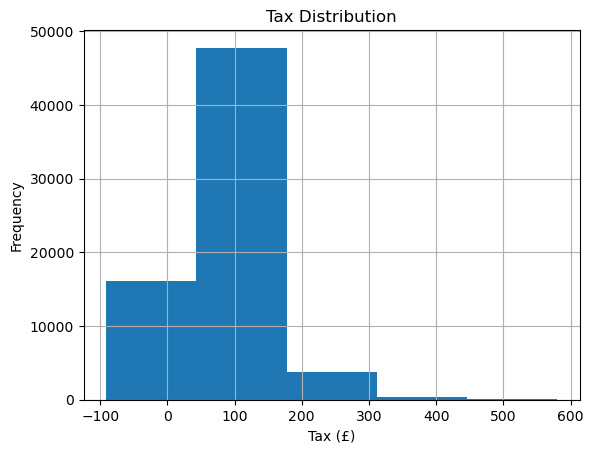

In [76]:
# Visualizing tax distribution

car_eval['tax'].hist(bins=5)  
plt.title('Tax Distribution')
plt.xlabel('Tax (£)')
plt.ylabel('Frequency')
plt.show()

In [82]:
# Quick correlation check 
print(car_eval[['tax', 'mpg', 'engineSize', 'price', 'year']].corr())

# It is peculiar that enginesize is slightly negatively correlated with mpg
# Tax and engingesize positively correlated as expected
# Tax and mpg negatively (contrary to what expected), same as for eginesize vs mpg
# Price and tax positively correlated as expected (extra tax above a threshold of price aka luxury tax)

## Nonetheless, the below are negigible correlation values 

                 tax       mpg  engineSize     price      year
tax         1.000000 -0.418794    0.256719  0.297102  0.179040
mpg        -0.418794  1.000000   -0.227497 -0.285626 -0.123254
engineSize  0.256719 -0.227497    1.000000  0.612243 -0.038421
price       0.297102 -0.285626    0.612243  1.000000  0.475712
year        0.179040 -0.123254   -0.038421  0.475712  1.000000


In [86]:
# Summary: 4 potential issues identified as of now: Negative values, Fractional values, Missing values, and possible Outliers

--------

##### Adressing identified Issues
##### Negative values

In [119]:
# Negative Values: 378 (0.50%) 
## As established, negative values are deemed to be due to errors. 3 main options to adress this:

# (1) Take absolute value: (logic: Human error, possibly the intention was to insert the number without the negative sign)
car_eval['tax'] = car_eval['tax'].abs()

# (2) Clip to zero
#car_eval['tax'] = car_eval['tax'].clip(lower=0)

# (3) Drop rows
#car_eval = car_eval[car_eval['tax'] >= 0]


# Possibly (1)? It relies on an assumption, but seems justifiable. Can we validate if its in fact the optimal decision? At this stage it seems so.

##### Fractional Values

In [ ]:
# Fractional values
## The DVLA publishes rates only in whole pounds. Hence, it is likely that the fractional values are not accurate. 2 main options to adress this:

# (1) Round to Nearest Integer
car_eval['tax'] = car_eval['tax'].round().astype(int)


# (2) Round to nearest official bracket
# # This would required that we are confident in the bands we would chose (bands vary per specific, such as pre vs post 2017) E.g.
# official_bands = np.array([
#     0, 10, 20, 30, 115, 125, 135, 140, 145, 150, 155, 165, 195, 200, 205, 230, 240, 
#     255, 265, 295, 305, 320, 325, 330, 555, 565 # It adds a layer of complexity and increases the probability of error
# ])

# # def snap_to_band(value):  # Function to "snap" to nearest band 
# #     if pd.isna(value):    # handles Nas
# #         return value
# #     distances = np.abs(official_bands - value)
# #     nearest_idx = np.argmin(distances)
# #     return official_bands[nearest_idx]
    
# car_eval['tax'] = car_eval['tax'].apply(snap_to_band) # Applies function


# (1) Seems like the superior option given the likelihood of error of option 2.



##### Missing values (!) This is to be adressed with all other Missing values of the remaining variables in another notebook (!)

In [ ]:
# 7904 (10.40%) Missing values where identified. 4 options to adress missing values:

# (1) Drop values: Higlhy unlikely to be the optimal option: Reduces predictive power

# (2) Simple imputation: Median is used to replace the missing values
# car_eval['tax'].fillna(car_eval['tax'].median(), inplace=True) 

# (3) Model-based imputation
   # 4.1 Regression
    # 4.2 KNN

# (!) This is to be adressed with all other Missing values of the remaining variables in another notebook (!)


In [91]:
# # Understanding if missing values follow a pattern

# car_eval['tax_missing'] = car_eval['tax'].isna()
# car_eval.groupby('fuelType')['tax_missing'].mean().sort_values(ascending=False)


fuelType
Diesel      0.109924
unknown     0.105228
Petrol      0.102062
Hybrid      0.063371
Other       0.035928
Electric    0.000000
Name: tax_missing, dtype: float64

In [92]:
# car_eval.groupby('tax_missing')[['year', 'mpg', 'engineSize', 'price']].mean()


year        mpg  engineSize         price
tax_missing                                                  
False        2017.088383  55.174206    1.661923  16796.326522
True         2017.167565  54.125775    1.644774  17618.755693

In [ ]:
# There is no clear indication of a specific pattern in terms of missing values for tax.
# They (thus far) appear to be missing at random (MAR)

# Hence, as per my research, it seems to best option is to impute

In [90]:
# Missing percentage
missing_pct = car_eval['tax'].isnull().mean() * 100
print(f"Missing tax: {car_eval['tax'].isnull().sum()} ({missing_pct:.2f}%)")

# Patterns by year/fuelType
print(car_eval[car_eval['tax'].isnull()]['year'].value_counts(normalize=True))
print(car_eval[car_eval['tax'].isnull()]['fuelType'].value_counts(normalize=True))

# Compare stats: missing vs. non-missing
print("Missing rows stats:")
print(car_eval[car_eval['tax'].isnull()][['year', 'mpg', 'engineSize']].describe())
print("Non-missing rows stats:")
print(car_eval[~car_eval['tax'].isnull()][['year', 'mpg', 'engineSize']].describe())



Missing tax: 7904 (10.40%)
year
2019.000000    0.325323
2017.000000    0.203618
2018.000000    0.149354
2016.000000    0.122997
2015.000000    0.079716
2014.000000    0.031137
2020.000000    0.024031
2013.000000    0.023773
2012.000000    0.007235
2011.000000    0.005297
2009.000000    0.004393
2010.676968    0.003359
2010.000000    0.003230
2008.000000    0.003101
2023.116964    0.002584
2007.000000    0.002584
2005.000000    0.001680
2023.977311    0.001550
2011.210853    0.001292
2006.000000    0.000646
2004.000000    0.000517
2003.000000    0.000517
2002.000000    0.000517
2010.268635    0.000258
2023.367078    0.000258
2023.389822    0.000258
2010.746403    0.000258
2009.816757    0.000129
2024.121759    0.000129
1998.000000    0.000129
2012.695740    0.000129
Name: proportion, dtype: float64
fuelType
Petrol     0.531756
Diesel     0.429529
unknown    0.020116
Hybrid     0.017839
Other      0.000759
Name: proportion, dtype: float64
Missing rows stats:
              year          m

In [50]:
# Checking frequency of each unique value of tax

year_unique_values= car_eval['year'].value_counts(dropna = False).sort_index()
pd.set_option('display.max_rows', None)
print(year_unique_values)

year
1970.000000        2
1996.000000        1
1997.000000        2
1998.000000        5
1999.000000        5
2000.000000        6
2001.000000       15
2002.000000       25
2003.000000       29
2004.000000       35
2005.000000       64
2006.000000       62
2007.000000      123
2008.000000      158
2009.000000      228
2009.816757       37
2010.000000      241
2010.268635       20
2010.371546       35
2010.565009       47
2010.676968       82
2010.746403       58
2011.000000      318
2011.111188       15
2011.210853       50
2012.000000      478
2012.695740       21
2013.000000     1902
2014.000000     2930
2015.000000     5733
2016.000000    11502
2017.000000    16146
2018.000000    10304
2019.000000    20271
2020.000000     3174
2022.696685       19
2022.878006       12
2023.116964       77
2023.267989       43
2023.367078       26
2023.389822       53
2023.605276       39
2023.977311       55
2024.121759       34
NaN             1491
Name: count, dtype: int64


In [13]:
# Missing values

missing_values_tax = car_eval['tax'].isnull().sum()
missing_values_tax

# 7904 Values missing (10.4 %) 

np.int64(7904)

In [39]:
# Check non-na empty values

missing_empty = (car_eval['tax'].astype(str).str.strip() == '').sum()
missing_empty

np.int64(0)

In [15]:
# Anomalies
# Negative values of tax

negative_values_tax = car_eval[car_eval['tax'] < 0]
negative_values_tax

Brand      model    year  price transmission  mileage fuelType  \
carID                                                                      
35263  Mercedes     C Clas     NaN  11295    Automatic  45000.0   Petrol   
46204  Mercedes    C Class  2019.0  66699    Semi-Auto    630.0   Petrol   
24750      Ford     Fiesta  2019.0  17000       Manual    796.0   Petrol   
20350      Ford      Focus  2015.0   7260       Manual  60661.0   Petrol   
64978      Opel      Astra  2016.0   9595    Automatic  30765.0   Petrol   
...         ...        ...     ...    ...          ...      ...      ...   
11302       BMW   4 Series  2018.0  21470    Automatic  40553.0   Petrol   
44238  Mercedes        SLK  2001.0   4990    Automatic  64476.0   Petrol   
20309      Ford     Fiesta  2013.0   6000       Manual  48133.0   Petrol   
33496   Hyundai        I20  2013.0   5495       Manual  30252.0   Petrol   
15708      Ford       Focu  2019.0  16998    Automatic   8703.0   Petrol   

             tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                         
35263 -56.193202  46.3      1.6000           59.0             NaN        0.0  
46204 -56.193202  28.5      4.0000           32.0             2.0        0.0  
24750 -45.780610  58.9      1.0000           80.0             4.0        0.0  
20350 -45.780610  60.1      1.0000            NaN             2.0        0.0  
64978 -20.241079  50.4      1.4000           30.0             2.0        0.0  
...          ...   ...         ...            ...             ...        ...  
11302 -43.242082  41.5      3.0000           44.0             3.0        0.0  
44238 -56.193202  27.2      3.2000           47.0             3.0        0.0  
20309 -45.780610  54.3      2.6312           40.0             4.0        0.0  
33496 -31.914945  57.6      1.2000           80.0             0.0        0.0  
15708 -45.780610  40.9      1.5000           45.0             0.0        0.0  

[378 rows x 13 columns]

In [ ]:
# Summary for tax
# (1) Issue identified: Negative values / Solution: Take absolute value
# (2) Issue identified: Fractional values / Solution: Round to nearest integer
# (3) Issue identified missing values: Solution: Adressed further ahead

In [4]:
# VERIFICAR SE O ABSOLUTO DOS VALORES NEGATIVOS DE TAX VAI DE ACORDO COM PREVISAO

# LOGISTIC MULTINOMIAL REGRESSION

import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# --- Bands from data ---
bands = [0,10,20,30,110,115,120,125,130,135,140,145,150,155,160,165,
         185,190,195,200,205,210,220,230,235,240,245,250,255,260,
         265,270,277.384254,280,290,290.486785,294.843409,295,
         299.473504,300,303.148891,305,315,316.296306,316.487189,
         325,326.028233,327.915778,330,520,535,540,555,565,570,580]

def snap_to_band(v):
    if pd.isna(v): 
        return np.nan
    return min(bands, key=lambda b: abs(v - b))

# Split and label 
features = ['engineSize','mpg','year','fuelType','Brand','model','transmission']
num = ['engineSize','mpg','year']
cat = ['fuelType','Brand','model','transmission']

pos_df = car_eval[car_eval['tax'] >= 0].copy()
neg_df = car_eval[car_eval['tax'] <  0].copy()

pos_df = pos_df.dropna(subset=['tax'])
pos_df['tax_band'] = pos_df['tax'].apply(snap_to_band)

# Drop rows with missing predictors for this quick validation
pos_fit = pos_df.dropna(subset=features+['tax_band']).copy()
neg_fit = neg_df.dropna(subset=features).copy()

# Cast band labels to strings so classifier treats them as classes
pos_fit['tax_band_str'] = pos_fit['tax_band'].astype(str)

# --- Preprocess & classifier ---
pre = ColumnTransformer([
    ('num', 'passthrough', num),
    ('cat', OneHotEncoder(handle_unknown='ignore'), cat)
])

clf = Pipeline([
    ('pre', pre),
    ('model', LogisticRegression(max_iter=1000, multi_class='auto'))
])

# Fit on positive-tax rows
clf.fit(pos_fit[features], pos_fit['tax_band_str'])
train_acc = accuracy_score(pos_fit['tax_band_str'], clf.predict(pos_fit[features]))
print("Training accuracy on positive-tax bands:", round(train_acc, 3))

# Predict on formerly negative-tax rows
neg_fit['tax_abs'] = neg_fit['tax'].abs()
neg_fit['tax_band_abs_str']  = neg_fit['tax_abs'].apply(snap_to_band).astype(str)
neg_fit['tax_band_pred_str'] = clf.predict(neg_fit[features])
neg_fit['band_match']        = (neg_fit['tax_band_pred_str'] == neg_fit['tax_band_abs_str'])

print(f"Formerly-negative rows — Band match rate: {neg_fit['band_match'].mean():.2%}")

print("\nSample mismatches:\n",
      neg_fit.loc[~neg_fit['band_match'],
      ['engineSize','mpg','year','fuelType','Brand','model','transmission',
       'tax','tax_abs','tax_band_pred_str','tax_band_abs_str']].head(10))



# The absolute values of negative tax entries (like 45.78, 20.24, etc.) don’t correspond to real tax bands in the positive-tax data (which cluster around 125–150).
#The classifier always predicted 145, because that’s the dominant and most frequent class (~43% of all cars).
# If we do add this regression step, we would have to do something other than the absolute value! Possibly add the values predicted here, or KNN.

C:\Users\thoma\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\linear_model\_logistic.py:1272: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.8. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\thoma\anaconda3\envs\Fall2526\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training accuracy on positive-tax bands: 0.513
Formerly-negative rows — Band match rate: 0.00%

Sample mismatches:
       engineSize   mpg    year fuelType     Brand     model transmission  \
168          4.0  28.5  2019.0   Petrol  Mercedes   C Class    Semi-Auto   
360          1.0  58.9  2019.0   Petrol      Ford    Fiesta       Manual   
1051         1.0  60.1  2015.0   Petrol      Ford     Focus       Manual   
1759         1.4  50.4  2016.0   Petrol      Opel     Astra    Automatic   
1804         1.5  55.4  2019.0   Petrol     Skoda   Octavia       Manual   
2188         1.0  65.7  2015.0   Petrol       ord    Fiesta       Manual   
2410         1.0  60.1  2019.0   Petrol     Skoda     Fabia       Manual   
2709         1.0  65.7  2018.0   Petrol      Ford    Fiesta       MANUAL   
2840         1.4  55.4  2016.0   Petrol      Opel     Corsa       Manual   
3028         1.0  62.8  2017.0   Petrol      Ford    Fiesta        manua   

            tax    tax_abs tax_band_pred_str ta

# PaintQuality

In [ ]:
# It represents the mechanic’s assessment of the car’s overall paint quality and hull integrit
# It seems to be a subjective but standardized metric, where its logicall ranges odd to be between 0 and 100

In [137]:
car_eval['paintQuality%'].describe()

# Max: How can it be above 100%?

count    74449.000000
mean        64.590667
std         21.021065
min          1.638913
25%         47.000000
50%         65.000000
75%         82.000000
max        125.594308
Name: paintQuality%, dtype: float64

In [95]:
car_eval["paintQuality%"].unique()

# Marta: "decidir o que fazer com os superior a 100. 1) truncar para 100. 2) apagar e preencher com a mediana 3)apagar e knn"
# Filipa: "existem valores acima de 100%, logo temos erros"

array([ 63.        ,  50.        ,  56.        ,  97.        ,
        74.        ,  75.        ,  59.        ,  85.        ,
        35.        ,  68.        ,  45.        ,  30.        ,
        69.        ,  53.        ,  57.        ,  40.        ,
        60.        ,  94.        ,  33.        ,  51.        ,
        47.        ,  87.        ,  61.        ,  83.        ,
        95.        ,  46.        ,  54.        ,  80.        ,
        77.        ,  90.        ,  91.        ,  71.        ,
        44.        ,  38.        ,  64.        ,  55.        ,
        66.        ,  82.        ,  41.        ,  81.        ,
        79.        ,  72.        ,  34.        ,  88.        ,
                nan,  43.        ,  31.        ,  32.        ,
        96.        ,  84.        ,  70.        ,  86.        ,
        92.        ,  52.        ,  39.        ,  42.        ,
        73.        ,  78.        ,  37.        ,  65.        ,
        93.        ,  89.        ,  99.        ,  36.  

In [112]:
## Check frequency of unique values of paintquality%

paintquality_unique_values= car_eval['paintQuality%'].value_counts(dropna = False).sort_index()
pd.set_option('display.max_rows', None)
print(paintquality_unique_values)

# Note: there is a very small amount of values below <30: Indiciative of error? Those, together with the ones above 100, are the only ones which are not .0000

paintQuality%
1.638913        19
1.769474        50
2.725153        21
3.115295        32
3.140370        40
3.172683        46
3.207418        60
3.225744        76
3.254760        15
30.000000     1028
31.000000     1065
32.000000     1107
33.000000     1044
34.000000     1147
35.000000     1025
36.000000     1082
37.000000     1051
38.000000     1039
39.000000      996
40.000000     1025
41.000000     1031
42.000000     1019
43.000000     1059
44.000000     1025
45.000000     1038
46.000000     1003
47.000000     1012
48.000000      980
49.000000     1082
50.000000     1033
51.000000     1077
52.000000     1032
53.000000     1081
54.000000     1114
55.000000     1018
56.000000     1062
57.000000     1089
58.000000     1041
59.000000     1051
60.000000      995
61.000000     1044
62.000000     1053
63.000000     1087
64.000000     1098
65.000000     1088
66.000000     1092
67.000000     1018
68.000000     1062
69.000000     1050
70.000000     1027
71.000000     1022
72.000000     100

In [105]:
# Unique values: Improvements in data understanding
## Creating logical categories: (Zeros, withi range, beyond range)

def paintquality_category(x):
    if pd.isna(x):
        return 'NaN'
    elif x == 0:
        return 'Zero'
    elif x < 0:
        return 'Negative'
    elif 0 < x <= 100:
        return 'Within range 0-100'
    else:
        return 'Beyong range > 100'

category_counts_paint = car_eval['paintQuality%'].apply(paintquality_category).value_counts()

print(category_counts_paint)

paintQuality%
Within range 0-100    74082
NaN                    1524
Beyong range > 100      367
Name: count, dtype: int64


In [ ]:
# There are 367 values over 100, these are immediate erros: Possible solution, "round" to max value of 100%

# Values around 1–3% are a very small cluster, maybe data entry errors? Nothing between >10% and <30% + 
## These and the above 100 are the only non whole integers. Somethings seems OFF.


In [113]:
low_paint = car_eval[car_eval['paintQuality%'] < 5]
print(f"Number of cars with paintQuality% < 5: {len(low_paint)}")


Number of cars with paintQuality% < 5: 359


In [118]:
# Adressing Values above > 100: Capping them at 100.

paintquality_above_100 = car_eval['paintQuality%'] > 100
n_hi = paintquality_above_100.sum()

car_eval.loc[paintquality_above_100, 'paintQuality%'] = 100.0

In [ ]:
# Summary for paintquality
# (1) Issue identified: Values above 100% values / Solution: "Rounding them to 100"
# (2) Issue identified: Suspicious cluster of low-values / Solution: Imputation BUT: As of now, im not sure if there is sufficient evidence to adress them? Check with group 
# (3) Issue identified missing values: Solution: Adressed further ahead

# PreviousOwners

In [ ]:
# PreviousOwners represents the number of previous registered owners of the vehicle.
## This variable appears straightforward in terms of data understanding.

In [121]:
car_eval.head()

Brand      model    year  price transmission  mileage fuelType    tax  \
carID                                                                           
69512      VW       Golf  2016.0  22290    Semi-Auto  28421.0   Petrol    NaN   
53000  Toyota      Yaris  2019.0  13790       Manual   4589.0   Petrol  145.0   
6366     Audi         Q2  2019.0  24990    Semi-Auto   3624.0   Petrol  145.0   
29021    Ford     FIESTA  2018.0  12500        anual   9102.0   Petrol  145.0   
10062     BMW   2 Series  2019.0  22995       Manual   1000.0   Petrol  145.0   

             mpg  engineSize  paintQuality%  previousOwners  hasDamage  \
carID                                                                    
69512  11.417268         2.0           63.0        4.000000        0.0   
53000  47.900000         1.5           50.0        1.000000        0.0   
6366   40.900000         1.5           56.0        4.000000        0.0   
29021  65.700000         1.0           50.0       -2.340306        0.0   
10062  42.800000         1.5           97.0        3.000000        0.0   

       tax_missing  
carID               
69512         True  
53000        False  
6366         False  
29021        False  
10062        False

In [136]:
car_eval['previousOwners'].describe()

# Negative values are the clear (immediate) anomaly

count    74423.000000
mean         2.014982
std          1.437389
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: previousOwners, dtype: float64

In [122]:
car_eval['previousOwners'].unique()

array([ 4.        ,  1.        , -2.34030622,  3.        ,  0.        ,
        2.        ,         nan, -2.34565   ,  6.25837066, -2.33512284,
        6.22789796,  6.25823052,  6.23017958, -2.33936045,  6.21772443,
        6.24583495, -2.29943868, -2.34010209, -2.31225953,  6.2482512 ,
       -2.31733109,  6.23308217,  6.24177863, -2.33744529])

In [124]:
previousOwners_unique_values= car_eval['previousOwners'].value_counts(dropna = False).sort_index()
pd.set_option('display.max_rows', None)
print(previousOwners_unique_values)

previousOwners
-2.345650       58
-2.340306       84
-2.340102       17
-2.339360       58
-2.337445       25
-2.335123       37
-2.317331       15
-2.312260       34
-2.299439       43
 0.000000    14879
 1.000000    14754
 2.000000    14644
 3.000000    14649
 4.000000    14763
 6.217724       21
 6.227898       15
 6.230180       37
 6.233082       46
 6.241779       20
 6.245835       64
 6.248251       32
 6.258231       78
 6.258371       50
 NaN          1550
Name: count, dtype: int64


In [134]:
# There can be no negative values in previous owners
## There should be not non-whole integers in previous owners

# If we assume human error, most likely the negative values could have been a mistake of reverse signal, hence we take the absolute values
car_eval['previousOwners'] = car_eval['previousOwners'].abs()

# We then round all values to the nearest integer
car_eval['previousOwners'] = np.round(car_eval['previousOwners']).clip(0, 6)

In [ ]:
# Summary for paintquality
# (1) Issue identified: Negative values / Solution: Take their absolute value
# (2) Issue identified: Again the same type of suspicious cluster of fractional positive numbers, but i dont think there is enough evidence to remove or impute / Solution: Round them to nearest integer
# (3) Issue identified missing values: Solution: Adressed further ahead

##### Something weird is going on

In [ ]:
# Something weird is going on:

# paintQuality% anomalies:
## Low tiny decimals (≈1.6–3.3) → counts sum ≈ 359.
##  High >100 & decimals (≈125.x) → counts sum ≈ 367.

# previousOwners anomalies:
## Negative  (~−2.31 to −2.35) → counts sum ≈ 371.
## Fractional (~6.217–6.258) → counts sum ≈ 363.

# tax anomalies:
## Negative  (≈ −91 to −18) → counts sum ≈ 378.
## Fractional numbers  (≈ 277.38–327.91, 290.48, 303.14, 316.48, etc.) → counts sum ≈ 411.


# There seems to be a clear pattern of  systematic "anomalies". Same amounts, no relation amongst rows where they occurr. What?

In [138]:
import os
os.getcwd()


'C:\\Users\\thoma\\OneDrive\\Ambiente de Trabalho\\Nova\\Machine Learning\\ML Project'